# 例1

In [1]:
import pandas as pd
digits_train = pd.read_csv("./Datasets/optdigits/optdigits.tra", header=None)
digits_test = pd.read_csv("./Datasets/optdigits/optdigits.tes", header=None)

print("digits_train.shape=", digits_train.shape)
digits_train.head()

digits_train.shape= (3823, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [2]:
import numpy as np
x_train = digits_train[np.arange(64)] # 0...63
y_train = digits_train[64]

x_test = digits_test[np.arange(64)]
y_test = digits_test[64]

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)  # 指定聚成10类
kmeans.fit(x_train)
y_predict = kmeans.predict(x_test)

In [4]:
from sklearn import metrics
print("ARI score:", metrics.adjusted_rand_score(y_test, y_predict)) # 有label，ARI类似于准确性，即预测对了多少

ARI score: 0.6630577949326525


In [5]:
from sklearn.metrics import silhouette_score
x_train_arr = np.array(x_train)
x_test_arr = np.array(x_test)
print("轮廓系数 train set:", silhouette_score(x_train_arr, kmeans.labels_, metric='euclidean'))  # 没有label，用轮廓系数衡量，分子是簇外的平均距离-同一簇的平均距离，所以越大越好
print("轮廓系数 test_set:", silhouette_score(x_test_arr, y_predict, metric='euclidean'))

轮廓系数 train set: 0.19155998704266303
轮廓系数 test_set: 0.18629996189284265


# 例2 轮廓系数与不同簇数量的关系曲线

In [6]:
import numpy as np
x1 = np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2 = np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
x = np.array(list(zip(x1,x2))).reshape(len(x1),2)

In [7]:
colors=['b','g','r','c','m','y','k','b']  # k_max=8
markers=['o','s','D','v','^','p','*','+']

clusters = [2,3,4,5,8] # k的取值


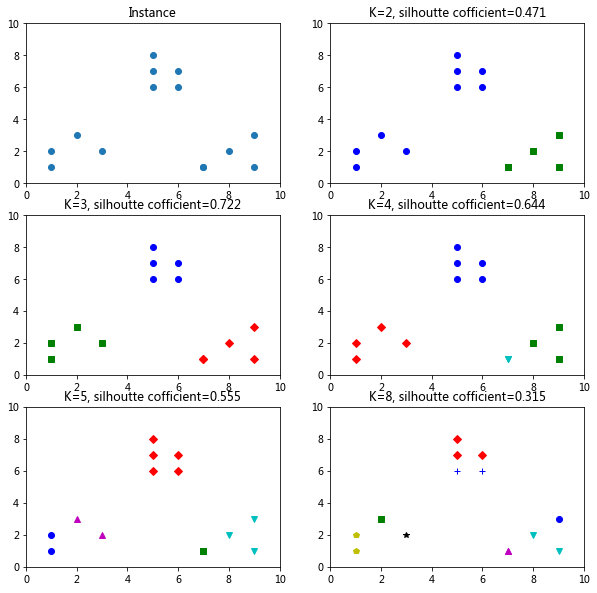

In [9]:
# 第一张散点图，没有聚类
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(10,10)
plt.subplot(3,2,1)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Instance")
plt.scatter(x1, x2)


# 后面5张图为聚类后的

subplot_counter = 1 #第1个子图已经被画过了，为Instance
sc_scores = []

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for t in clusters:
    subplot_counter += 1
    plt.subplot(3,2,subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(x)
    
    for i, l in enumerate(kmeans_model.labels_): # i=0,1,...,样本长度，l=该样本label
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls=None)
    plt.xlim([0,10])
    plt.ylim([0,10])
    sc_score = silhouette_score(x, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)
    plt.title('K=%s, silhoutte cofficient=%0.03f' % (t, sc_score))
    
plt.show()
    
    

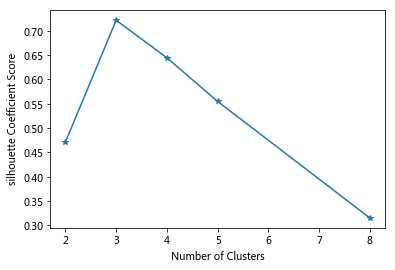

In [10]:
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette Coefficient Score")
plt.show()

# k=3的时候，轮廓系数最大。k=3 最佳

# 例3 “肘部”观察平均距离与类簇数量的关系，确定最佳簇数量

In [18]:
import numpy as np
cluster1 = np.random.uniform(0.5, 1.5, (2,10))
cluster2 = np.random.uniform(5.5, 6.5, (2,10))
cluster3 = np.random.uniform(3.0, 4.0, (2,10))
x = np.hstack((cluster1, cluster2, cluster3)).T
x.shape

(30, 2)

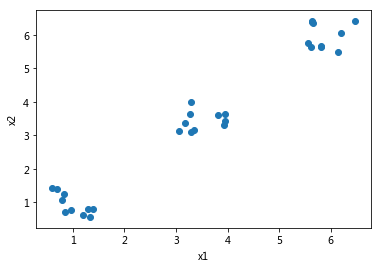

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

K = range(1,10) #测试 k=1,...,9
meandistortions=[]

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    x_dist = np.min(cdist(x, kmeans.cluster_centers_, "euclidean"), axis=1)  # 每个样本至各聚类中心的距离(30,3)-->(30,)
    meandistortions.append(sum(x_dist)/x.shape[0])   # 每个样本至最近的聚类中心的平均距离


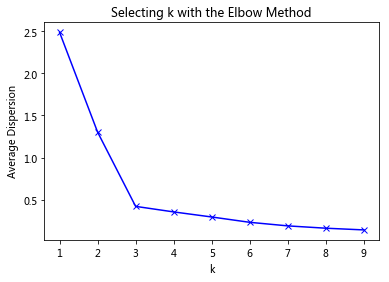

In [33]:
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title("Selecting k with the Elbow Method")
plt.show()

# k 取3最佳